In [21]:
from sklearn.datasets import fetch_openml

mnist =fetch_openml('mnist_784', version=1 ,as_frame=False)
mnist.keys()


c:\Users\WSU\anaconda3\envs\py311\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [22]:
X = mnist['data']
y = mnist['target']

print("X:", X.shape)
print("y:", y.shape)

X: (70000, 784)
y: (70000,)


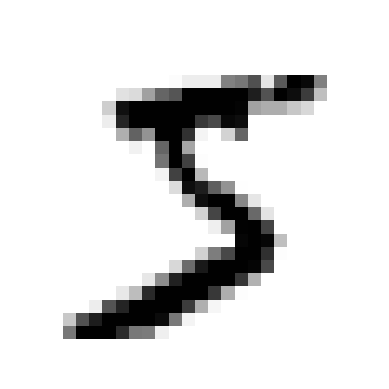

In [23]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

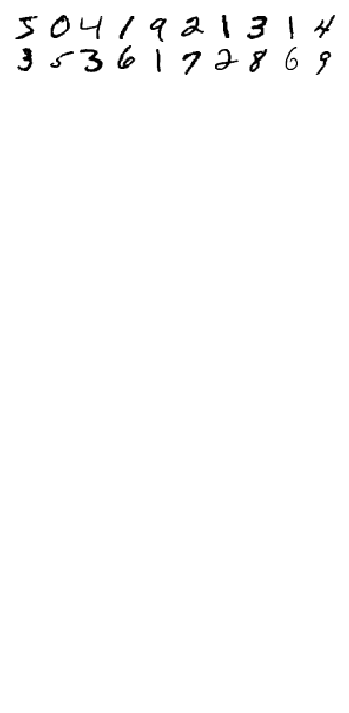

In [24]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis('off')
    return plt.show()

def plot_digit(instance, image_per_row):
    size =28
    image_per_row = min(len(instance), image_per_row)
    n_cols = len(instance)-1 // image_per_row+1
    n_empty = n_cols * image_per_row - len(instance)
    padded_instance = np.concatenate([instance, np.zeros((n_empty,28*28))],axis=0)
    image_grid =padded_instance.reshape((n_cols,image_per_row,size,size))
    big_image = image_grid.transpose(0,2,1,3).reshape(n_cols*size, image_per_row*size)
    plt.imshow(big_image,cmap = mpl.cm.binary, interpolation='nearest' )
    plt.axis('off')
plt.figure(figsize=(9,9))
instance = X[:20]
plot_digit(instance, image_per_row=10)
plt.show()

In [25]:
y = y.astype(np.int8)
X_train, X_test, y_train, y_test  =X[:56000], X[56000:], y[:56000],y[56000:]

In [26]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

y_test_5

array([False, False,  True, ..., False,  True, False])

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X[0]])

array([ True])

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring="accuracy")

array([0.95955429, 0.96083999, 0.95665917])

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred =  cross_val_predict(sgd_clf, X_train,y_train_5, cv =3)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5,y_train_pred)

0.753887399463807

In [32]:
y_train_3 = (y_train==3)
y_test_3 = (y_test==3)

y_test_3

array([False, False, False, ..., False, False, False])

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_3)
sgd_clf.predict([X[0]])

array([ True])

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_3,cv=3, scoring="accuracy")

array([0.9582686 , 0.9506616 , 0.96710597])

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred3 =  cross_val_predict(sgd_clf, X_train,y_train_3, cv =3)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_3, y_train_pred3)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred3)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_3, y_train_pred3)
recall_score(y_train_3, y_train_pred3)
f1_score(y_train_3,y_train_pred3)

0.7699801192842943

In [39]:
precision_score(y_train_3, y_train_pred3)

0.8940443213296398

In [40]:
recall_score(y_train_3, y_train_pred3)

0.6761522346368715